## Results Analysis: Lower and Higher Starting Price and Equilibrium

### Imports

In [1]:
import pandas as pd
import numpy as np

# Stats
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.api import OLS
from statsmodels.stats.stattools import jarque_bera

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Custom
from utils.plots import *

#### Version

In [2]:
import matplotlib
import platform

print(f"""
Python version: {platform.python_version()}
Pandas version: {pd.__version__}
Numpy version: {np.__version__}
Seaborn version: {sns.__version__}
Matplotlib version: {matplotlib.__version__}
""")



Python version: 3.6.6
Pandas version: 1.0.0
Numpy version: 1.18.1
Seaborn version: 0.9.0
Matplotlib version: 3.1.3



## Setup

In [3]:
# Widen the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (30.0, 15.0)

In [4]:
import os
os.chdir("..")

# Equilibrium Analysis

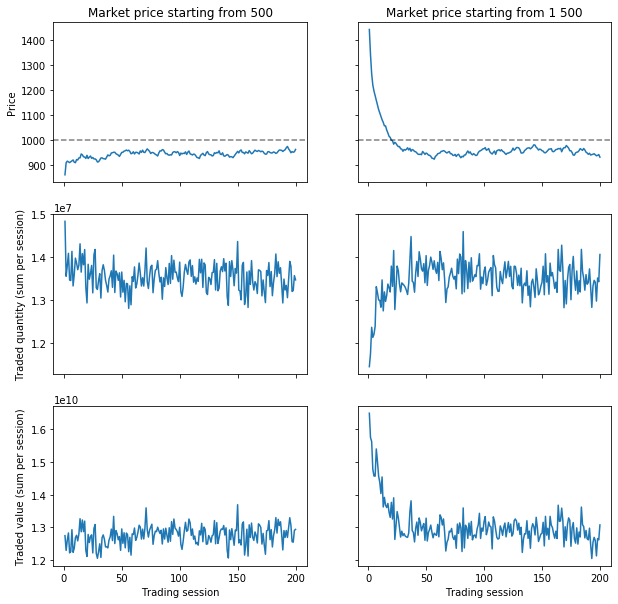

In [5]:
fig = plot_timeseries_two_scenarios(
    pd.read_csv("results/basic_upd_lower/trades.csv"), 
    pd.read_csv("results/basic_upd_higher/trades.csv"),
    equilibrium = 1000,
    names = ["Market price starting from 500", "Market price starting from 1 500"]
)
fig.savefig(f"../thesis/plots/basic_trades.png")

## Order book

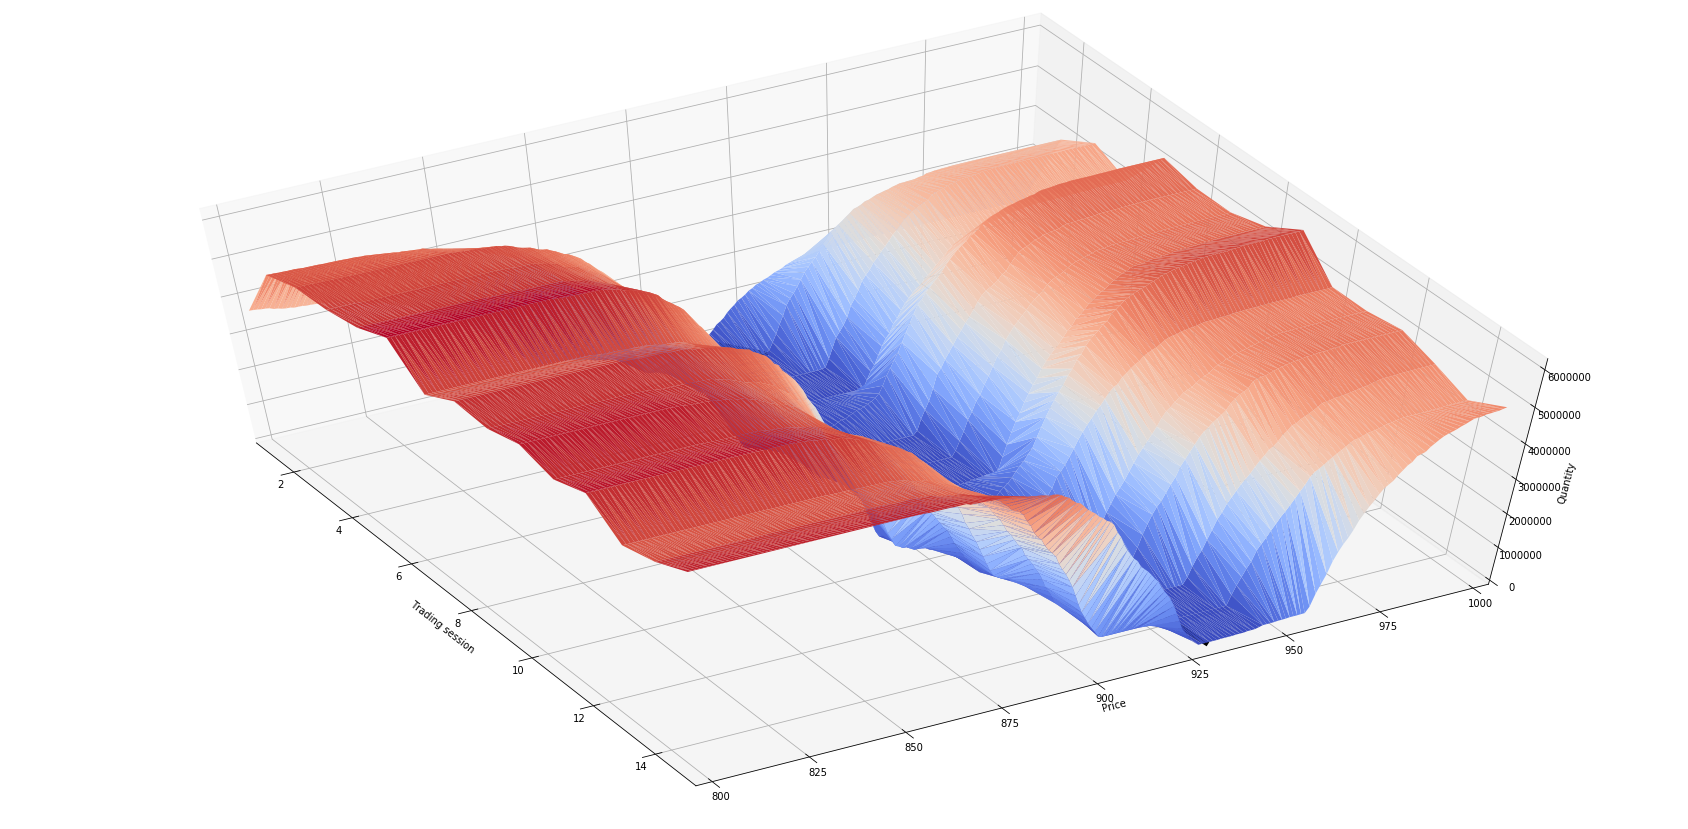

In [6]:
df_books = pd.read_csv("results/basic_upd_lower/books.csv").set_index("day")
df_books = df_books.loc[0:15]

fig = plot_market_depth(df_books, (800, 1000));
#fig.savefig(f"../thesis/plots/basic_market_depth_converge_lower.png")

y = pd.read_csv("results/basic_upd_lower/trades.csv").groupby("trading_day")["price"].last().loc[0:15]
x = range(1, 16)
z = [0] * len(x)
plt.plot(x, y, z, color="k", linewidth=5)

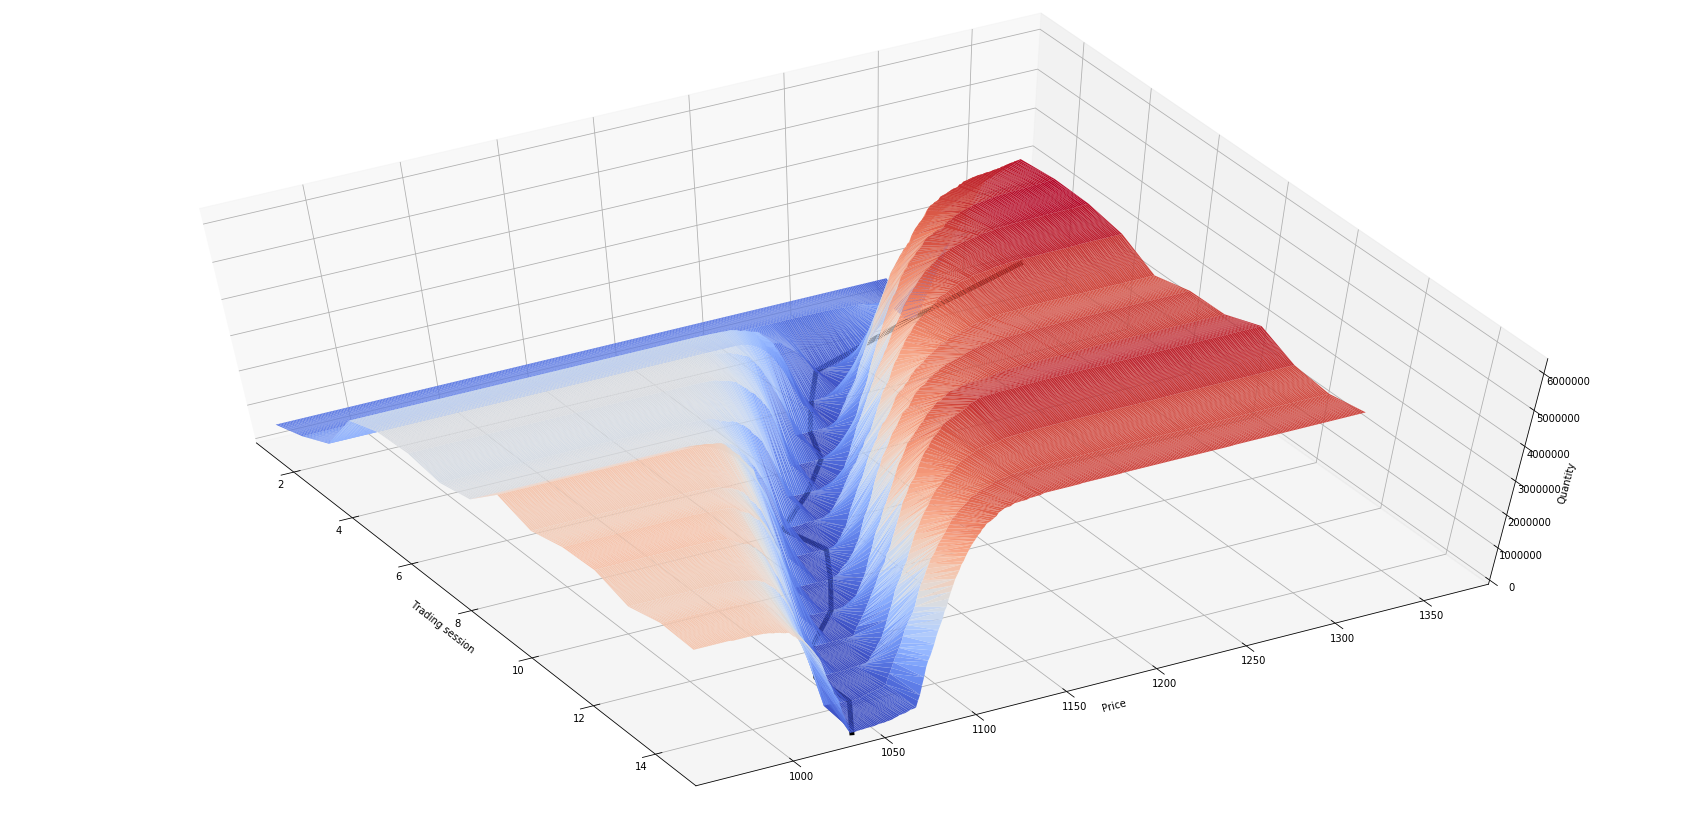

In [7]:
df_books = pd.read_csv("results/basic_upd_higher/books.csv").set_index("day")
df_books = df_books.loc[0:15]

fig = plot_market_depth(df_books, (900, 1300));
#fig.savefig(f"../thesis/plots/basic_market_depth_converge_higher.png")
y = pd.read_csv("results/basic_upd_higher/trades.csv").groupby("trading_day")["price"].last().loc[0:15]
x = range(1, 16)
z = [0] * len(x)
plt.plot(x, y, z, color="k", linewidth=5)

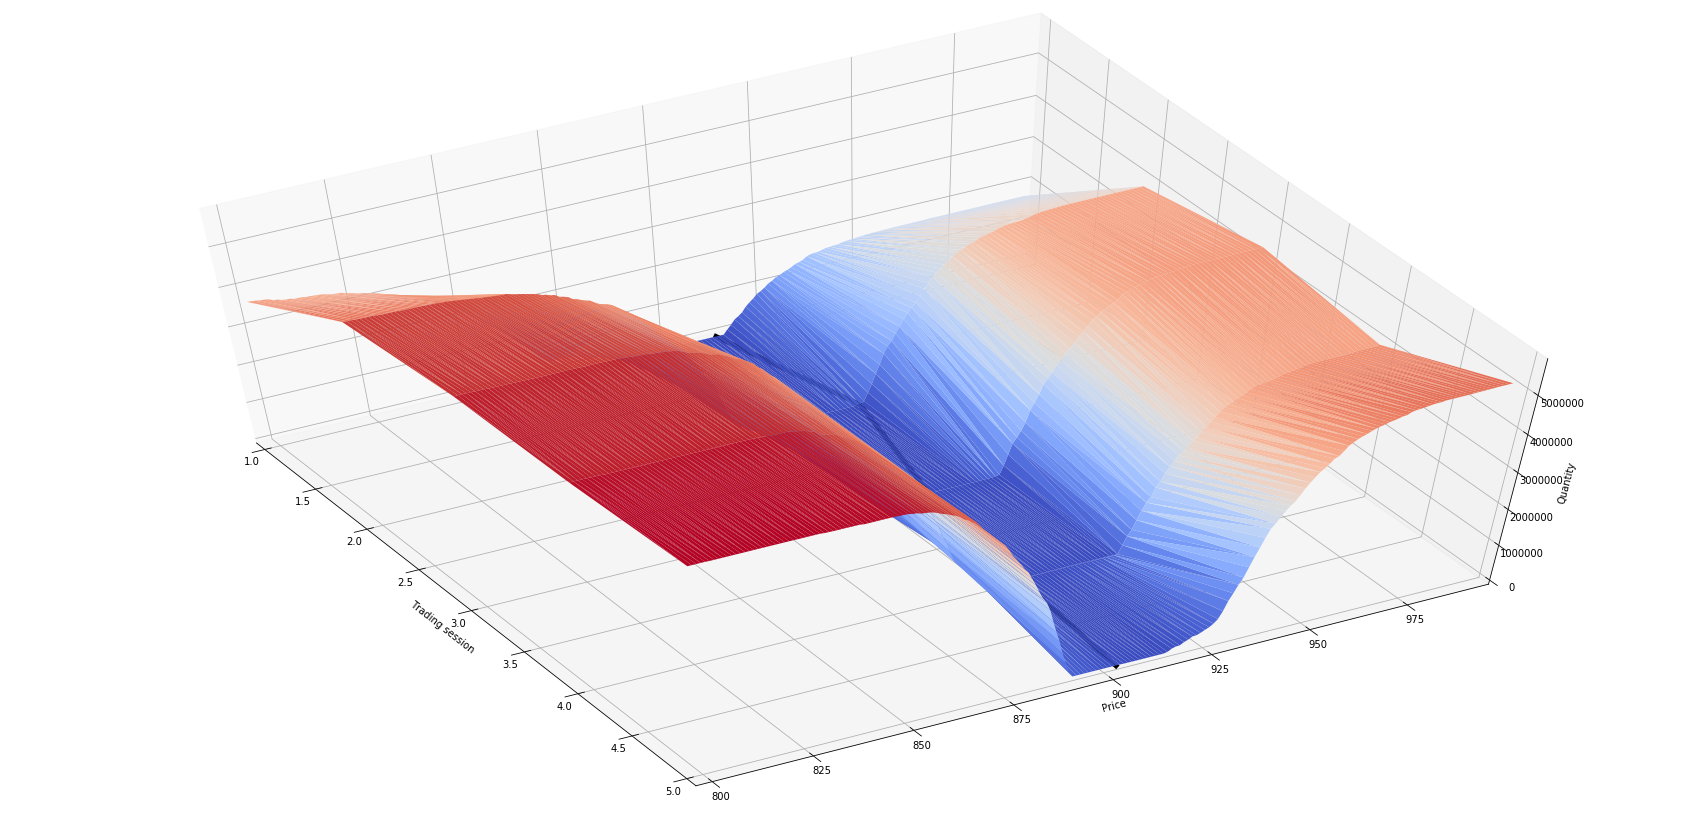

In [8]:
df_books = pd.read_csv("results/basic_upd_lower/books.csv").set_index("day")
df_books = df_books.loc[0:5]

fig = plot_market_depth(df_books, (800, 1000), view=(60, -30)); # , (800, 1000)
#fig.savefig(f"../thesis/plots/basic_market_depth_converge_lower.png")
y = pd.read_csv("results/basic_upd_lower/trades.csv").groupby("trading_day")["price"].last().loc[0:5]
x = range(1, 6)
z = [0] * len(x)
plt.plot(x, y, z, color="k", linewidth=5)

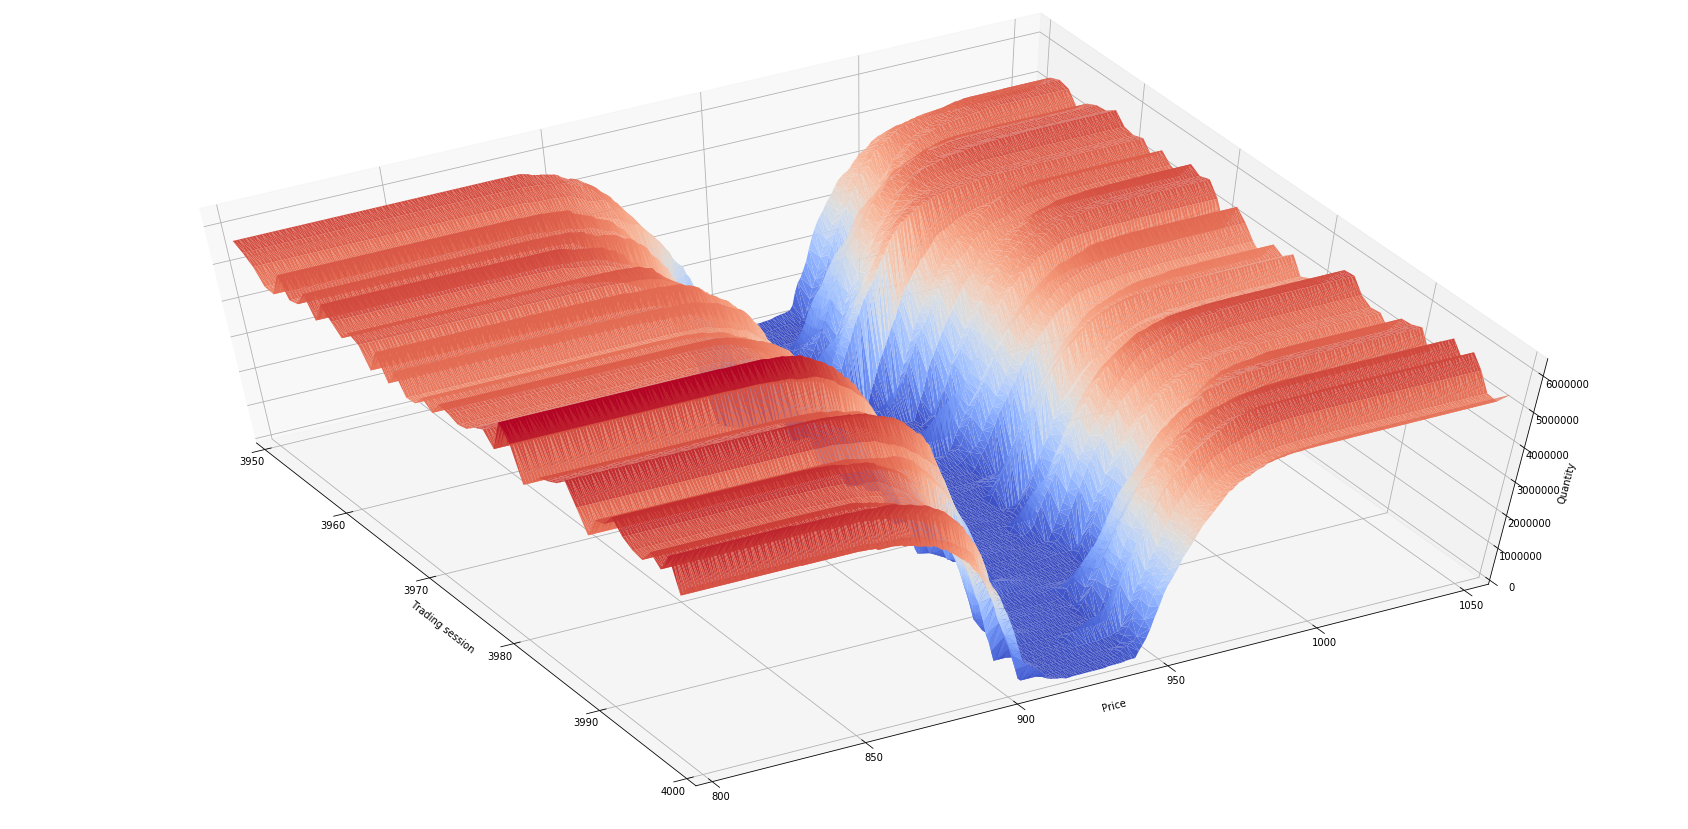

In [9]:
df_books = pd.read_csv("results/basic_upd/books.csv").set_index("day")
df_books = df_books.loc[3950:4000]

plot_market_depth(df_books, (800, 1200));
#fig.savefig(f"../thesis/plots/basic_market_depth_in_equilibrium.png")


### Order book

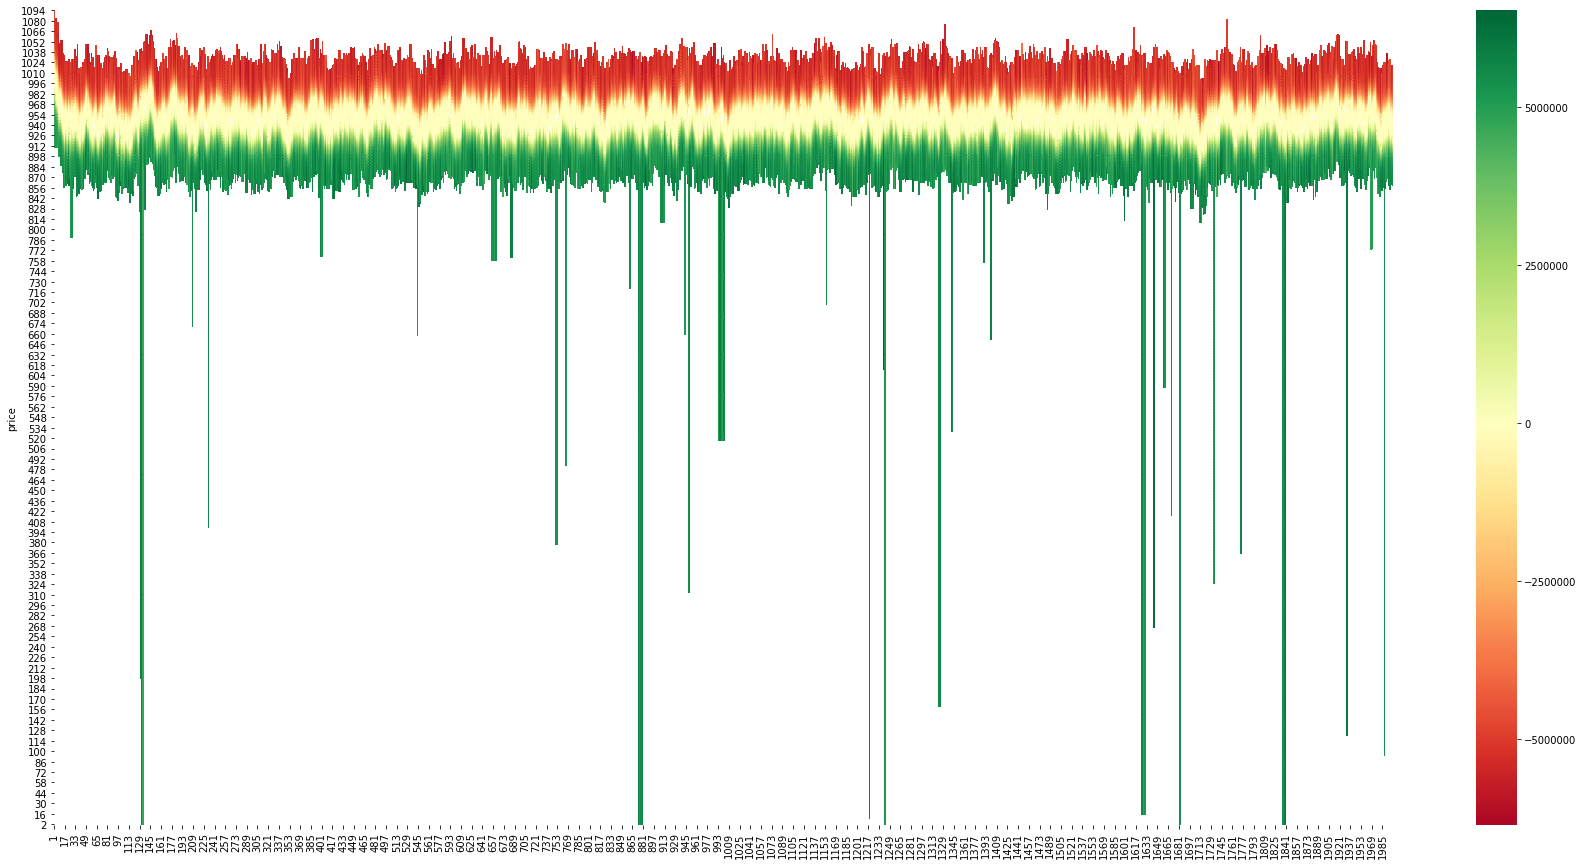

In [10]:
plot_order_book_heatmap(pd.read_csv("results/basic_upd/books.csv").set_index("day").loc[:2000])

### Order books, lower & higher starting price

Text(0.5, 1, 'Market price starting from 1 500')

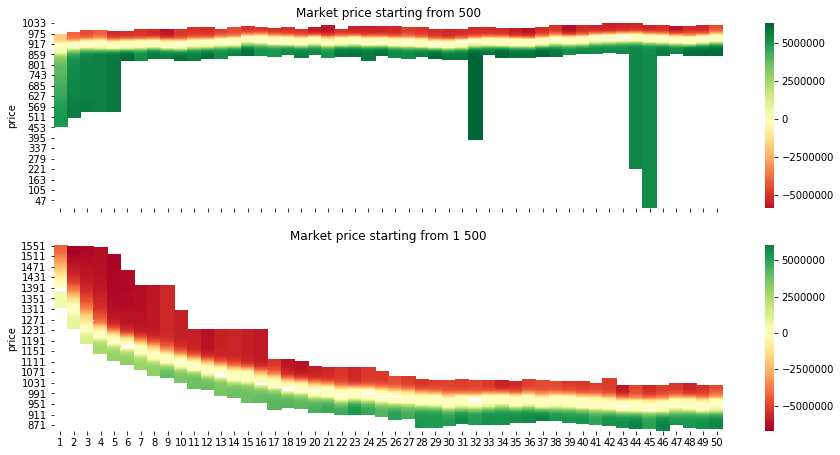

In [11]:
plt.rcParams['figure.figsize'] = (15.0, 7.5)

fig, axs = plt.subplots(2, 1, sharex='col') # , figsize=[10,10]
plot_order_book_heatmap(pd.read_csv("results/basic_upd_lower/books.csv").set_index("day").loc[0:50], ax=axs[0])
plot_order_book_heatmap(pd.read_csv("results/basic_upd_higher/books.csv").set_index("day").loc[0:50], ax=axs[1])

axs[0].set_title("Market price starting from 500", fontsize=12)
axs[1].set_title("Market price starting from 1 500", fontsize=12)
#fig.savefig(f"../thesis/plots/basic_order_book_evo.png")

### Market Depth in Equilibrium

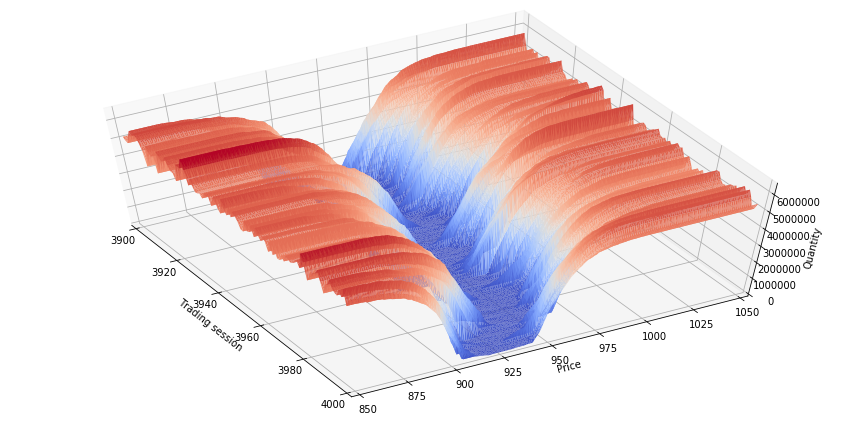

In [12]:
df_books = pd.read_csv("results/basic_upd/books.csv").set_index("day")
df_books = df_books.loc[3900:4000]

fig = plot_market_depth(df_books, (850, 1050));
#fig.savefig(f"../thesis/plots/basic_market_depth_in_equilibrium.png")

## Stylized facts

### Autocorrelation

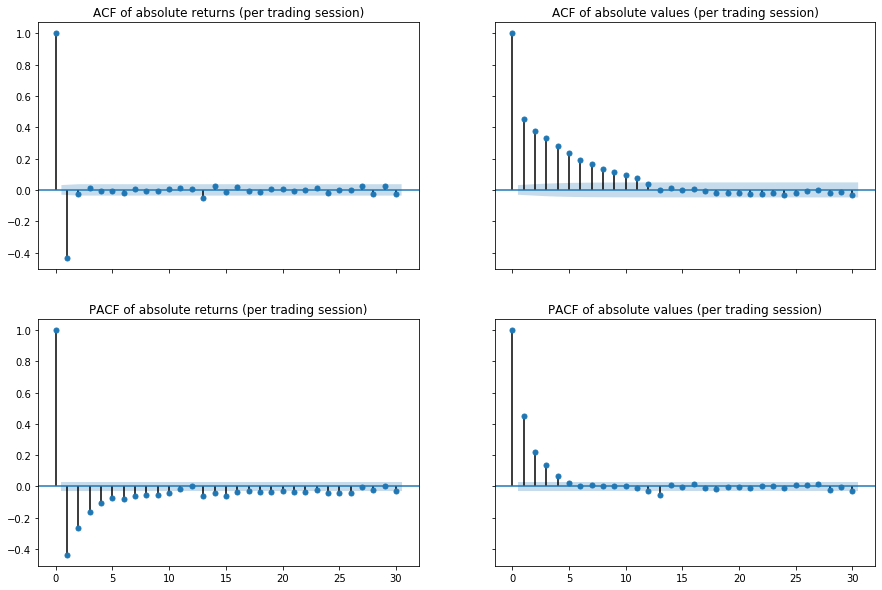

In [13]:
df = pd.read_csv("results/basic_upd/trades.csv")
fig = plot_autocorrelation(df, absolute_return=True, absolute_values=True, figsize = [15,10])
#fig.savefig(f"../thesis/plots/basic_autocorrelation.png")

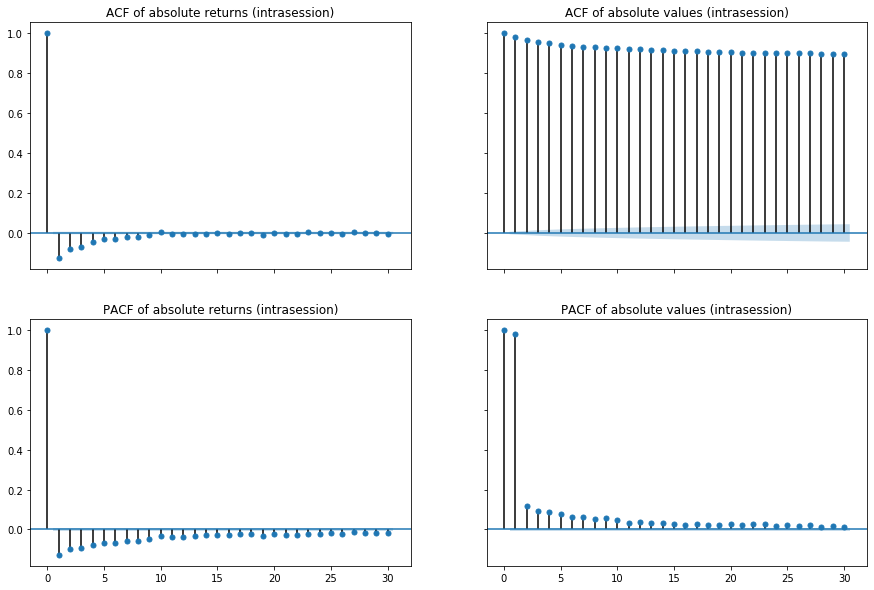

In [14]:
df = pd.read_csv("results/basic_upd/trades.csv")
fig = plot_autocorrelation(df.loc[:100000], intrasession=True, absolute_return=True, absolute_values=True, figsize = [15,10])
#fig.savefig(f"../thesis/plots/basic_autocorrelation_intra.png")

### Volatility Clusters

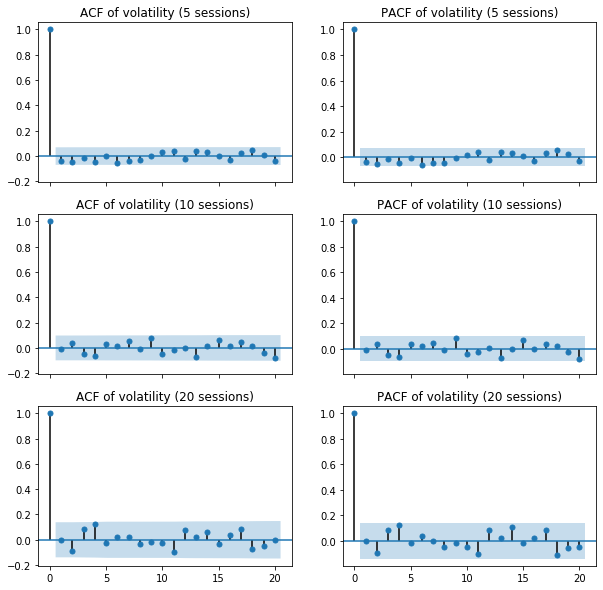

In [15]:
df = pd.read_csv("results/basic_upd/trades.csv")
fig = plot_volaclusters(df, [5, 10, 20])
#fig.savefig(f"../thesis/plots/basic_volaclusters.png")

### Per session

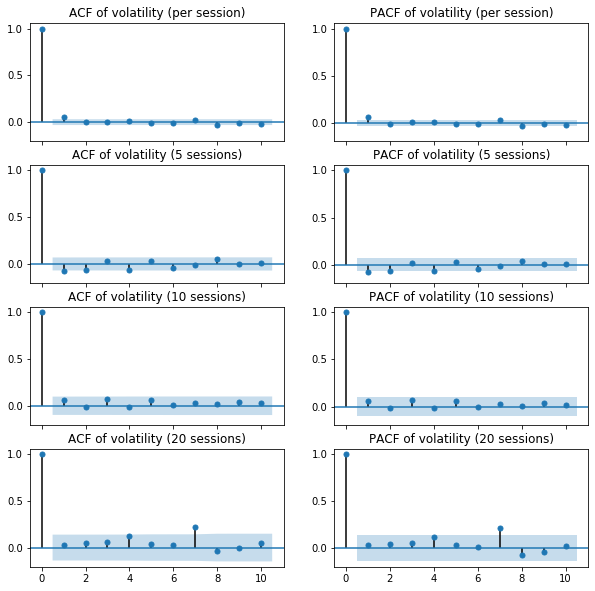

In [16]:
df = pd.read_csv("results/basic_upd/trades.csv")
fig = plot_volaclusters_per_session(df, [5, 10, 20])
#fig.savefig(f"../thesis/plots/basic_volaclusters_intra_per_session.png")

### Intra session

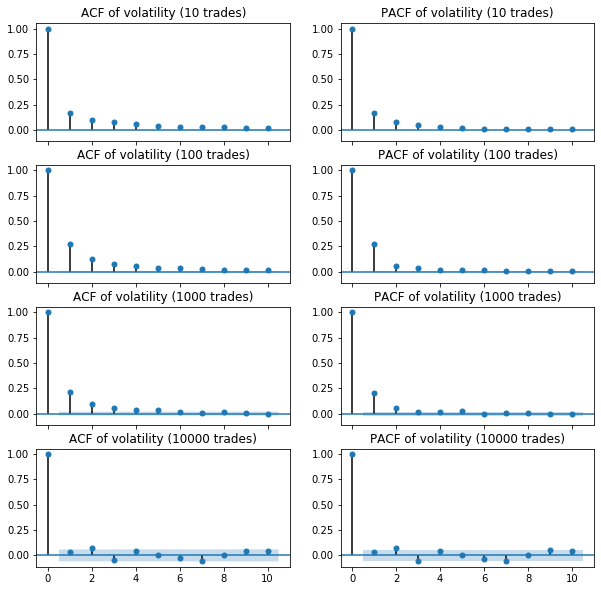

In [17]:
df = pd.read_csv("results/basic_upd/trades.csv").iloc[-5_000_000:]
df = df#[df["trading_day"] >= 100]
fig = plot_volaclusters_intrasession(df, [10, 100, 1000, 10000])
#fig.savefig(f"../thesis/plots/basic_volaclusters_intra.png")

## Fat-tailed

### Intrasession

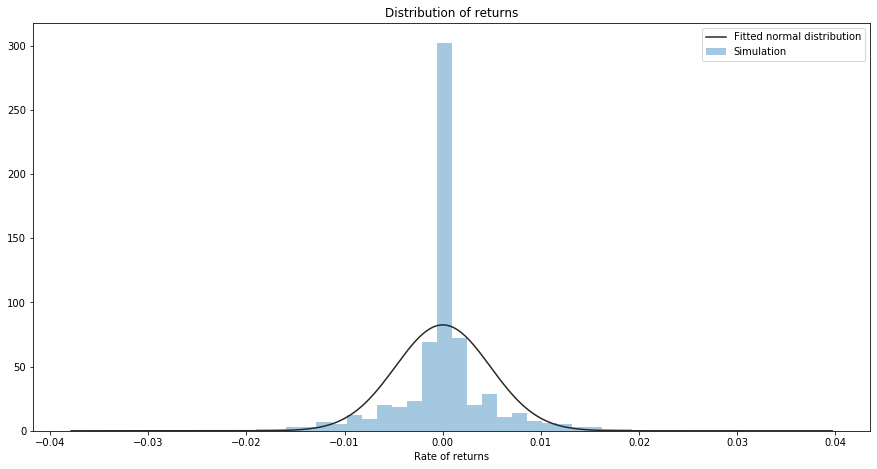

In [18]:
df_trd = pd.read_csv("results/basic_upd/trades.csv")
fig = plot_fat_tails(df_trd)
#fig.savefig(f"../thesis/plots/basic_fat_tails_intrasession.png")

### Per Session

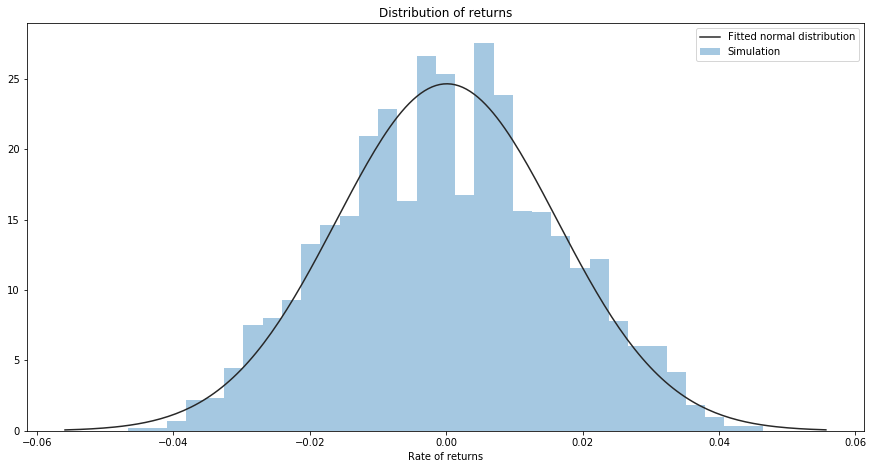

In [19]:
df_trd = pd.read_csv("results/basic_upd/trades.csv")
fig = plot_fat_tails_per_session(df_trd)
#fig.savefig(f"../thesis/plots/basic_fat_tails_per_session.png")